# Playing with Matplotlib


Please note I am making no assumptions nor any conclusions as I have not studied this data, it's actual original source, the source I got it from or even looked at most of the dataset itself. It is just some data to make graphs with and part of a tutorial.

In [1]:
import pandas as pd

#Demo used a direct link to the hosted file but a) slower and b) someone else's bandwidth
women_majors = pd.read_csv('percent_bachelors.csv', encoding='utf-8')

under_20 = women_majors.loc[0, women_majors.loc[0] < 20]
print(under_20)

Agriculture           4.229798
Architecture         11.921005
Business              9.064439
Computer Science     13.600000
Engineering           0.800000
Physical Sciences    13.800000
Name: 0, dtype: float64


## Calling Matplotlib ... magic

[Literally](https://ipython.readthedocs.io/en/stable/interactive/plotting.html#id1) referred to as magic. Then again [Clarke's Third Law](https://en.wikipedia.org/wiki/Clarke%27s_three_laws).

Calling it with the `inline` backend so the output (graphs) are shown under the code block that produced them

In [2]:
%matplotlib inline

## Let us make a default graph

So we are going to use the year column for the x axis and results of the under_20 index labels. 

figsize requires a tuple and formats the size of the figure in inches, width followed by height.

Type is : <class 'matplotlib.axes._subplots.AxesSubplot'>


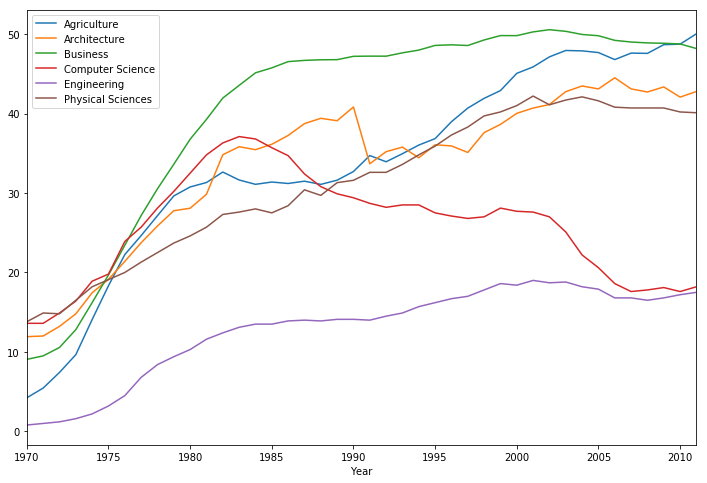

In [3]:
under_20_graph = women_majors.plot(x = 'Year', y = under_20.index, figsize = (12,8))
print("Type is :", type(under_20_graph))

## Matplotlib refers to parts of a graph as below:

![Matplotlib graph labels](anatomy1.png)
Source: [Matplotlib.org](Matplotlib.org)

## Making it look like 538's style

fivethirtyeight seems to be a US website and below is the google description:

> Nate Silver's FiveThirtyEight uses statistical analysis — hard numbers — to tell compelling stories about elections, politics, sports, science, economics and ...

A backend of the style is [here](https://github.com/matplotlib/matplotlib/blob/38be7aeaaac3691560aeadafe46722dda427ef47/lib/matplotlib/mpl-data/stylelib/fivethirtyeight.mplstyle) on github and the author of the style sheet discusses it [here](https://dataorigami.net/blogs/napkin-folding/17543615-replicating-538s-plot-styles-in-matplotlib) in a blog post.

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


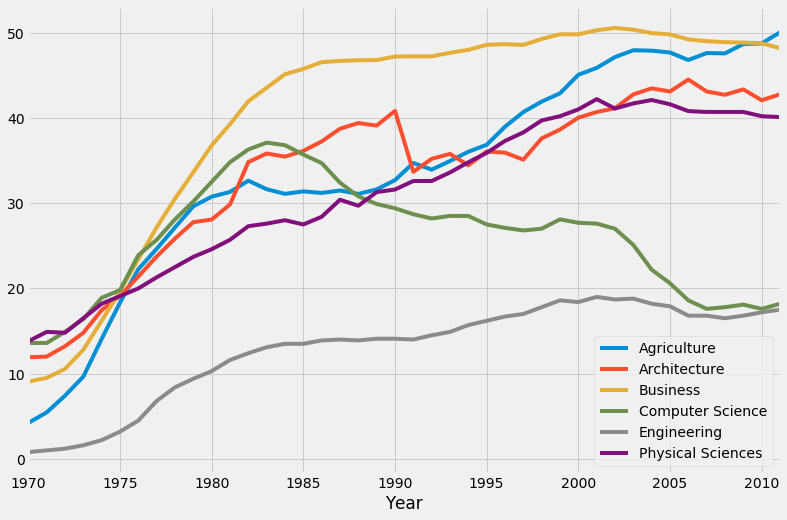

In [4]:
import matplotlib.style as style
print(style.available)

style.use('fivethirtyeight')
women_majors.plot(x = 'Year', y = under_20.index, figsize = (12,8))

## Further work to do

- [ ] Add a title and a subtitle.
- [ ] Remove the block-style legend, and add labels near the relevant plot lines. We’ll also have to make the grid lines transparent around these labels.
- [ ] Add a signature bottom bar which mentions the author of the graph and the source of the data.
- Add a couple of other small adjustments:
    - [ ] increase the font size of the tick labels;
    - [ ] add a “%” symbol to one of the major tick labels of the y-axis;
    - [ ] remove the x-axis label;
    - [ ] bold the horizontal grid line at y = 0;
    - [ ] add an extra grid line next to the tick labels of the y-axis;
    - [ ] increase the lateral margins of the figure.
    
Going to assign the graph to fte_graph and start working on this list

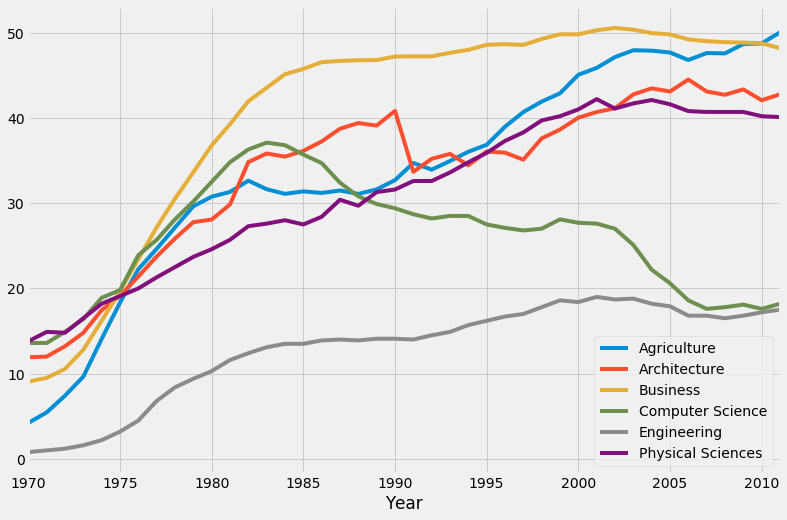

In [5]:
fte_graph = women_majors.plot(x = 'Year', y = under_20.index, figsize = (12,8))

# Matplotlib gotcha

Text is positioned based on the x and y coords of the generated graph so finish playing with those first

Also you need to have all the variables you are going to use on the graph in the same code block. Spacing them out as I have here doesn't produce a graph but makes it easier to learn.

## Custom tick labels

- [x] increase the font size of the tick labels;

`tick_params()` is a method for modifying the ticks.
- `axis` defines which axis to work on
- `which` are we working on the major or minor ticks
- `labelsize` font size


 - [x] add a “%” symbol to one of the major tick labels of the y-axis;

`set_yticklabels(labels = [list])`
- there is also a `get_yticks()`
- using some empty spaces in all the percentages that don't have the sign so they align

In [6]:
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
fte_graph.set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40   ', '50%'])

[Text(0, -10.0, '-10'),
 Text(0, 0.0, '0   '),
 Text(0, 10.0, '10   '),
 Text(0, 20.0, '20   '),
 Text(0, 30.0, '30   '),
 Text(0, 40.0, '40   '),
 Text(0, 50.0, '50%')]

## Make the y = 0 line bold

-  [x] bold the horizontal grid line at y = 0;

The title is a little bit of a lie as what we are actually going to do is add a new horizontal line at y = 0 which will be over the top of the other one. 

`axhline()` is the method for this and we are going to use the below arguements (doc for method is [here](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axhline.html?highlight=axhline#matplotlib.axes.Axes.axhline))
   - `y` where on the y axis we want the line
   - `color` what color we want the line
   - `linewidth` how wide we want the line
   - `alpha` how transparent we want the line or can be used to drop the color intensity

In [7]:
fte_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

## Add an extra vertical line

- [x] add an extra grid line next to the tick labels of the y-axis;

To add the additional grid line near to the labels on the y axis we are going to extend the x axis range using `set_xlim()`

`set_xlim()` we are going to use 2 simple and self explanatory parameters:
- `left` where we want the start
- `right` where we want the end 

In [8]:
fte_graph.set_xlim(left = 1969, right = 2011)

(1969, 2011)

## Generating a sig bar

- [x] remove the x-axis label;
- [x] Add a signature bottom bar which mentions the author of the graph and the source of the data.

### Removing the x axis label

`set_visible(False)` we are going to use this method on the x axis label. 

### Generate the sig

This is slightly messy as it requires some testing on position but at the same time works nicely when it is sorted. Between the Author and Source details you will need to pad with spaces.

We are going to set the background of a text area to the grey required and the text colour to the actual graphs background colour. The "white space" of spacing will actually be the selected background colour.

The method is `text()`
- `x` coord 
- `y` coord
- `s` the string you want to use`
- `fontsize` 
- `color` text colour
- `backgroundcolor` 

In [9]:
fte_graph.xaxis.label.set_visible(False)
fte_graph.text(x = 1965.8, y = -7, s = 'In your general direction Source: National Center for Education Statistics', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

Text(1965.8, -7, 'In your general direction Source: National Center for Education Statistics')

We could also do things with multple lines of text as per below:

`fte_graph.text(x = 1967.1, y = -6.5,
    s = '________________________________________________________________________________________________________________',
    color = 'grey', alpha = .7)

fte_graph.text(x = 1966.1, y = -9,
    s = '   ©DATAQUEST                                                                               Source: National Center for Education Statistics   ',
    fontsize = 14, color = 'grey', alpha = .7)`

## Adding a title and a subtitle

- [x] Add a title and a subtitle.

Apparently Matplotlib's inbuilt `title()` and `subtitle()` methods do not allow much control over the positioning there for it can be simpler to use the `text()` method. This will need some finesing into the final location but allows a lot of precision.

`weight` can be used within the `text()` method to make text bold.

Text inside `text()` doesn't wordwrap you need to use `\n` when you want it to move onto a new line 

In [10]:
fte_graph.text(x = 1966.65, y = 62.7, s = "Some title for this graph that is interesting", fontsize = 26, weight = "bold", alpha = .75)
fte_graph.text(x = 1966.65, y = 57, s = "A sub title text that goes on and on and on so hopefuly it will\nword wrap onto the second line and look awesome", fontsize = 19, alpha = .85)


Text(1966.65, 57, 'A sub title text that goes on and on and on so hopefuly it will\nword wrap onto the second line and look awesome')

## Colourblind friendly colours

![Colour blind friendly colours](cb_friendly.jpg)
Source: [Points of View: Color blindness by Bang Wong](http://www.nature.com/nmeth/journal/v8/n6/full/nmeth.1618.html#ref1)

We need to declare all the colours we want the graph to use. We are going to use the above colours as they are more friendly to people with colourblindness but we are not going to use the yellow as reading yellow on white or grey is generally difficult.

We then need to modify the `plot()` to include the arguement `color =` assigned to whatever we call the colours variable.
- One odd thing is for this color arguement (not text) we need to pass the colours as floats between 0 - 1. Hence the `[230/255,159/255,0]`
- Needs to be passed as a list of lists

In [11]:
colours = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

## Remove the legend and place labels directly on the lines in the same colour

- [x] Remove the block-style legend, and add labels near the relevant plot lines. We’ll also have to make the grid lines transparent around these labels.

To remove the standard legend we add `legend = False` to the `plot()`.

To make the text labels easier to read we will set their background to the main background colour which will effectively make the grid lines disappear around the labels.

Lastly we will use the `rotation` parameter so the text lines up nicely with the lines. 

Text(1976, 25, 'Physical Sciences')

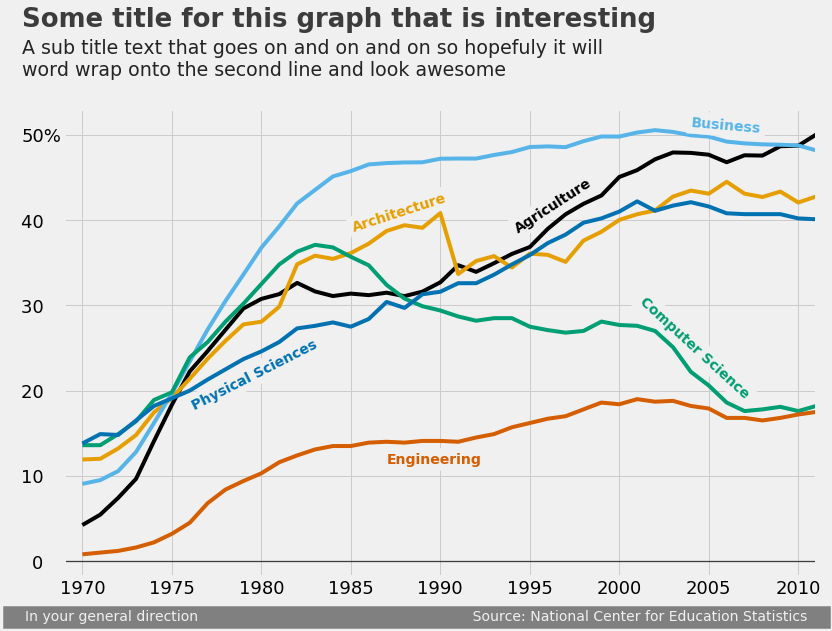

In [12]:
#Defining our colour set
colours = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]
#Set the graph name and the data it is going to plot
fte_graph = women_majors.plot(x = 'Year', y = under_20.index, figsize = (12,8), color = colours, legend = False)
#Place some text in the correct position to be a title with weighing and larger size
fte_graph.text(x = 1966.65, y = 62.7, s = "Some title for this graph that is interesting", fontsize = 26, weight = "bold", alpha = .75)
#Place some text in the correct position to be a subtitle
fte_graph.text(x = 1966.65, y = 57, s = "A sub title text that goes on and on and on so hopefuly it will\nword wrap onto the second line and look awesome", fontsize = 19, alpha = .85)
#Place some text in the correct position and colour to generate a sig bar
fte_graph.text(x = 1965.8, y = -7, s = '    In your general direction                                                             Source: National Center for Education Statistics    ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
#Widen the x axis
fte_graph.set_xlim(left = 1969, right = 2011)
#Make the x axis label invisible
fte_graph.xaxis.label.set_visible(False)
#Put a bold line over y = 0
fte_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
#Making the axis labels larger
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
#Changing the x axis tick labels
fte_graph.set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40   ', '50%'])
#Line labels
fte_graph.text(x = 1994, y = 44, s = 'Agriculture', color = colours[0], weight = 'bold', rotation = 33,
              backgroundcolor = '#f0f0f0')
fte_graph.text(x = 1985, y = 42.2, s = 'Architecture', color = colours[1], weight = 'bold', rotation = 18,
              backgroundcolor = '#f0f0f0')
fte_graph.text(x = 2004, y = 51, s = 'Business', color = colours[2], weight = 'bold', rotation = -5,
               backgroundcolor = '#f0f0f0')
fte_graph.text(x = 2001, y = 30, s = 'Computer Science', color = colours[3], weight = 'bold', rotation = -42.5,
              backgroundcolor = '#f0f0f0')
fte_graph.text(x = 1987, y = 11.5, s = 'Engineering', color = colours[4], weight = 'bold',
              backgroundcolor = '#f0f0f0')
fte_graph.text(x = 1976, y = 25, s = 'Physical Sciences', color = colours[5], weight = 'bold', rotation = 27,
              backgroundcolor = '#f0f0f0')


# So this is as per tutorial

Thanks to [Dataquest.io](https://www.dataquest.io) for the blog post tutorial